**MEMUAT DATASET**

In [1]:
import pandas as pd

data = pd.read_excel(r"C:\Users\FARIS\Documents\Program Skripsi/Z-AlizadehDataset.xlsx", 
                     sheet_name='Sheet 1 - Table 1')

**DATA PRE-PROCESSING (DATA CLEANING, DATA TRANSFORMATION, DATA NORMALIZATION, DAN DATA SPLITTING)**

**DATA CLEANING**

Memeriksa Missing Value

In [2]:
data.isnull().sum()

Age                      0
Weight                   0
Length                   0
Sex                      0
BMI                      0
DM                       0
HTN                      0
Current Smoker           0
EX-Smoker                0
FH                       0
Obesity                  0
CRF                      0
CVA                      0
Airway disease           0
Thyroid Disease          0
CHF                      0
DLP                      0
BP                       0
PR                       0
Edema                    0
Weak Peripheral Pulse    0
Lung rales               0
Systolic Murmur          0
Diastolic Murmur         0
Typical Chest Pain       0
Dyspnea                  0
Function Class           0
Atypical                 0
Nonanginal               0
Exertional CP            0
LowTH Ang                0
Q Wave                   0
St Elevation             0
St Depression            0
Tinversion               0
LVH                      0
Poor R Progression       0
B

Memeriksa Data Duplicate

In [3]:
data.duplicated().sum()

0

Tidak terdapat data hilang dan data yang duplikat pada dataset

**DATA TRANSFORMATION**

In [4]:
from sklearn.preprocessing import OneHotEncoder
data.drop(columns=['Exertional CP', 'BBB'], inplace=True, axis=1)
columns_to_encode = [
    'Sex', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease',
    'CHF', 'DLP', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur',
    'Diastolic Murmur', 'Dyspnea', 'Atypical', 'Nonanginal', 'LowTH Ang',
    'LVH', 'Poor R Progression', 'VHD', 'Cath'
]
encoder = OneHotEncoder(sparse_output=False)
for column in columns_to_encode:
    encoded = encoder.fit_transform(data[[column]])
    encoded_data = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([column]))
    data = pd.concat([data.iloc[:, :data.columns.get_loc(column)+1], encoded_data, data.iloc[:, data.columns.get_loc(column)+1:]], axis=1)
    if (column == 'VHD'):
        data.drop(columns=[column, data.columns[data.columns.get_loc(column)+4]], inplace=True)
    else:
        data.drop(columns=[column, data.columns[data.columns.get_loc(column)+2]], inplace=True)
data[['Sex_Fmale', 'Obesity_N', 'CRF_N', 'CVA_N', 'Airway disease_N', 'Thyroid Disease_N',
    'CHF_N', 'DLP_N', 'Weak Peripheral Pulse_N', 'Lung rales_N', 'Systolic Murmur_N',
    'Diastolic Murmur_N', 'Dyspnea_N', 'Atypical_N', 'Nonanginal_N', 'LowTH Ang_N',
    'LVH_N', 'Poor R Progression_N', 'VHD_Mild', 'VHD_Moderate', 'VHD_N', 'Cath_Cad']]

,Sex_Fmale,Obesity_N,CRF_N,CVA_N,Airway disease_N,Thyroid Disease_N,CHF_N,DLP_N,Weak Peripheral Pulse_N,Lung rales_N,...,Dyspnea_N,Atypical_N,Nonanginal_N,LowTH Ang_N,LVH_N,Poor R Progression_N,VHD_Mild,VHD_Moderate,VHD_N,Cath_Cad
0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
299,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
300,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
301,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


**DATA SPLITTING**

Membagi data variabel independen (X) dan dependen (y)

In [5]:
X = data.drop(columns=['Cath_Cad'])
y = data['Cath_Cad']

Membagi data untuk data training dan data testing

Pembagian Data Training 70% Testing 30%

In [6]:
from sklearn.model_selection import train_test_split
X_train_DataSplitA, X_test_DataSplitA, y_train_DataSplitA, y_test_DataSplitA = train_test_split(X, y, test_size=0.3, random_state=42)
print("Jumlah data pada set train DataSplitA:", X_train_DataSplitA.shape[0])
print("Jumlah data pada set test DataSplitA:", X_test_DataSplitA.shape[0])

Jumlah data pada set train DataSplitA: 212
Jumlah data pada set test DataSplitA: 91


Pembagian Data Training 80% Testing 20%

In [7]:
X_train_DataSplitB, X_test_DataSplitB, y_train_DataSplitB, y_test_DataSplitB = train_test_split(X, y, test_size=0.2, random_state=42)
print("Jumlah data pada set train DataSplitB:", X_train_DataSplitB.shape[0])
print("Jumlah data pada set test DataSplitB:", X_test_DataSplitB.shape[0])

Jumlah data pada set train DataSplitB: 242
Jumlah data pada set test DataSplitB: 61


Pembagian Data Training 90% Testing 10%

In [8]:
X_train_DataSplitC, X_test_DataSplitC, y_train_DataSplitC, y_test_DataSplitC = train_test_split(X, y, test_size=0.1, random_state=42)
print("Jumlah data pada set train DataSplitC:", X_train_DataSplitC.shape[0])
print("Jumlah data pada set test DataSplitC:", X_test_DataSplitC.shape[0])

Jumlah data pada set train DataSplitC: 272
Jumlah data pada set test DataSplitC: 31


**DATA STANDARDIZATION**

Standardisasi Untuk Data 7030

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_DataSplitA_scaled = scaler.fit_transform(X_train_DataSplitA)
X_train_DataSplitA_scaled = pd.DataFrame(
    X_train_DataSplitA_scaled,
    columns=
       ['Age', 'Weight', 'Length', 'Sex_Fmale',	'BMI', 'DM', 'HTN',	'Current Smoker', 
        'EX-Smoker', 'FH', 'Obesity_N', 'CRF_N', 'CVA_N', 'Airway disease_N', 'Thyroid Disease_N',
        'CHF_N', 'DLP_N', 'BP',	'PR', 'Edema', 'Weak Peripheral Pulse_N', 'Lung rales_N',
        'Systolic Murmur_N', 'Diastolic Murmur_N', 'Typical Chest Pain', 'Dyspnea_N', 'Function Class',
        'Atypical_N', 'Nonanginal_N', 'LowTH Ang_N', 'Q Wave', 'St Elevation',	'St Depression',	
        'Tinversion', 'LVH_N', 'Poor R Progression_N', 'FBS', 'CR',	'TG', 'LDL', 'HDL',	'BUN', 'ESR',
        'HB', 'K', 'Na', 'WBC',	'Lymph', 'Neut', 'PLT',	'EF-TTE', 'Region RWMA', 'VHD_Mild', 'VHD_Moderate', 
        'VHD_N']
)
X_test_DataSplitA_scaled = scaler.transform(X_test_DataSplitA)
X_test_DataSplitA_scaled = pd.DataFrame(
    X_test_DataSplitA_scaled,
    columns=
       ['Age', 'Weight', 'Length', 'Sex_Fmale',	'BMI', 'DM', 'HTN',	'Current Smoker', 
        'EX-Smoker', 'FH', 'Obesity_N', 'CRF_N', 'CVA_N', 'Airway disease_N', 'Thyroid Disease_N',
        'CHF_N', 'DLP_N', 'BP',	'PR', 'Edema', 'Weak Peripheral Pulse_N', 'Lung rales_N',
        'Systolic Murmur_N', 'Diastolic Murmur_N', 'Typical Chest Pain', 'Dyspnea_N', 'Function Class',
        'Atypical_N', 'Nonanginal_N', 'LowTH Ang_N', 'Q Wave', 'St Elevation',	'St Depression',	
        'Tinversion', 'LVH_N', 'Poor R Progression_N', 'FBS', 'CR',	'TG', 'LDL', 'HDL',	'BUN', 'ESR',
        'HB', 'K', 'Na', 'WBC',	'Lymph', 'Neut', 'PLT',	'EF-TTE', 'Region RWMA', 'VHD_Mild', 'VHD_Moderate', 
        'VHD_N']
)
X_train_DataSplitA_scaled

,Age,Weight,Length,Sex_Fmale,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD_Mild,VHD_Moderate,VHD_N
0,-2.204005,-1.116056,0.071282,1.175595,-1.279834,1.573344,-1.198658,2.01187,-0.170664,-0.405999,...,0.498949,-0.650451,-0.217614,0.247021,-0.804185,-0.185808,1.207560,-0.972088,-0.322749,1.297515
1,-0.388147,0.303233,-0.036659,-0.850633,0.357017,-0.635589,0.834266,-0.49705,-0.170664,-0.405999,...,-0.267552,-0.028740,-0.017466,-0.932006,1.237483,0.346506,-0.545883,-0.972088,3.098387,-0.770704
2,-0.005861,0.637183,0.287163,-0.850633,0.460072,1.573344,-1.198658,-0.49705,-0.170664,-0.405999,...,1.265450,1.877844,-0.217614,0.934786,0.905119,-1.782750,-0.545883,-0.972088,3.098387,-0.770704
3,-0.101432,0.136258,0.395104,-0.850633,-0.153560,-0.635589,0.834266,-0.49705,5.859465,-0.405999,...,0.243448,-0.733346,1.183426,-0.833753,-0.345205,0.346506,-0.545883,1.028714,-0.322749,-0.770704
4,1.236569,-0.448155,1.150689,-0.850633,-1.238724,-0.635589,0.834266,-0.49705,-0.170664,-0.405999,...,-0.267552,-0.153082,-1.918877,1.720804,-0.994107,-2.847377,-0.545883,-0.972088,3.098387,-0.770704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,-0.866004,0.804159,0.395104,-0.850633,0.550453,-0.635589,0.834266,-0.49705,-0.170664,-0.405999,...,0.243448,0.012708,0.382831,-0.538997,0.272043,0.346506,0.330838,-0.972088,-0.322749,1.297515
208,0.280854,-1.283031,1.150689,-0.850633,-2.049746,-0.635589,0.834266,-0.49705,-0.170664,-0.405999,...,-0.267552,0.675867,-0.517837,0.443525,-0.709224,-1.250436,-0.545883,1.028714,-0.322749,-0.770704
209,0.949855,-1.366518,-1.331948,1.175595,-0.625989,-0.635589,0.834266,-0.49705,-0.170664,-0.405999,...,-0.523053,-0.443214,0.783128,-1.030258,-0.361032,0.878820,-0.545883,-0.972088,-0.322749,1.297515
210,-1.057147,0.553696,0.287163,1.175595,0.371013,-0.635589,-1.198658,-0.49705,-0.170664,-0.405999,...,-0.267552,0.261393,-0.217614,-0.047736,1.696463,0.878820,-0.545883,-0.972088,-0.322749,1.297515


Standardisasi Untuk Data 8020

In [10]:
scaler = StandardScaler()
X_train_DataSplitB_scaled = scaler.fit_transform(X_train_DataSplitB)
X_train_DataSplitB_scaled = pd.DataFrame(
    X_train_DataSplitB_scaled,
    columns=
       ['Age', 'Weight', 'Length', 'Sex_Fmale',	'BMI', 'DM', 'HTN',	'Current Smoker', 
        'EX-Smoker', 'FH', 'Obesity_N', 'CRF_N', 'CVA_N', 'Airway disease_N', 'Thyroid Disease_N',
        'CHF_N', 'DLP_N', 'BP',	'PR', 'Edema', 'Weak Peripheral Pulse_N', 'Lung rales_N',
        'Systolic Murmur_N', 'Diastolic Murmur_N', 'Typical Chest Pain', 'Dyspnea_N', 'Function Class',
        'Atypical_N', 'Nonanginal_N', 'LowTH Ang_N', 'Q Wave', 'St Elevation',	'St Depression',	
        'Tinversion', 'LVH_N', 'Poor R Progression_N', 'FBS', 'CR',	'TG', 'LDL', 'HDL',	'BUN', 'ESR',
        'HB', 'K', 'Na', 'WBC',	'Lymph', 'Neut', 'PLT',	'EF-TTE', 'Region RWMA', 'VHD_Mild', 'VHD_Moderate', 
        'VHD_N']
)
X_test_DataSplitB_scaled = scaler.transform(X_test_DataSplitB)
X_test_DataSplitB_scaled = pd.DataFrame(
    X_test_DataSplitB_scaled,
    columns=
       ['Age', 'Weight', 'Length', 'Sex_Fmale',	'BMI', 'DM', 'HTN',	'Current Smoker', 
        'EX-Smoker', 'FH', 'Obesity_N', 'CRF_N', 'CVA_N', 'Airway disease_N', 'Thyroid Disease_N',
        'CHF_N', 'DLP_N', 'BP',	'PR', 'Edema', 'Weak Peripheral Pulse_N', 'Lung rales_N',
        'Systolic Murmur_N', 'Diastolic Murmur_N', 'Typical Chest Pain', 'Dyspnea_N', 'Function Class',
        'Atypical_N', 'Nonanginal_N', 'LowTH Ang_N', 'Q Wave', 'St Elevation',	'St Depression',	
        'Tinversion', 'LVH_N', 'Poor R Progression_N', 'FBS', 'CR',	'TG', 'LDL', 'HDL',	'BUN', 'ESR',
        'HB', 'K', 'Na', 'WBC',	'Lymph', 'Neut', 'PLT',	'EF-TTE', 'Region RWMA', 'VHD_Mild', 'VHD_Moderate', 
        'VHD_N']
)
X_train_DataSplitB_scaled

,Age,Weight,Length,Sex_Fmale,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD_Mild,VHD_Moderate,VHD_N
0,-0.956735,0.355889,0.586018,-0.839181,-0.071131,-0.637947,-1.20185,2.036894,-0.17259,-0.411196,...,-1.289830,1.513612,-0.992845,0.712348,-0.803370,0.343009,1.172386,1.033623,-0.331801,-0.776305
1,1.160330,0.355889,-0.064516,-0.839181,0.438081,-0.637947,0.83205,-0.490944,-0.17259,-0.411196,...,-0.023033,-1.417718,0.004120,0.126326,-0.786944,-0.193220,2.037378,1.033623,-0.331801,-0.776305
2,-1.534116,0.695633,0.477595,-0.839181,0.364619,-0.637947,-1.20185,2.036894,-0.17259,-0.411196,...,-0.276392,0.210799,0.203513,0.126326,-0.162765,0.879237,-0.557598,1.033623,-0.331801,-0.776305
3,-0.956735,-0.323599,0.152329,1.191638,-0.472936,-0.637947,0.83205,-0.490944,-0.17259,-0.411196,...,0.230327,-1.377005,0.901388,-1.045719,-0.146339,1.415466,-0.557598,1.033623,-0.331801,-0.776305
4,-1.052965,1.120314,0.477595,-0.839181,0.807910,-0.637947,0.83205,-0.490944,-0.17259,-0.411196,...,-0.023033,-0.033479,0.303209,-0.948049,-0.113487,-0.193220,-0.557598,1.033623,-0.331801,-0.776305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,-0.860505,0.780569,0.369173,-0.839181,0.541141,-0.637947,0.83205,-0.490944,-0.17259,-0.411196,...,0.230327,0.007234,0.402906,-0.557367,0.313583,0.343009,0.307394,-0.967471,-0.331801,1.288154
238,0.294258,-1.342832,1.128129,-0.839181,-2.109738,-0.637947,0.83205,-0.490944,-0.17259,-0.411196,...,-0.276392,0.658641,-0.494363,0.419337,-0.704815,-1.265676,-0.557598,1.033623,-0.331801,-0.776305
239,0.967869,-1.427768,-1.365583,1.191638,-0.658231,-0.637947,0.83205,-0.490944,-0.17259,-0.411196,...,-0.529751,-0.440608,0.801691,-1.045719,-0.343448,0.879237,-0.557598,-0.967471,-0.331801,1.288154
240,-1.052965,0.525761,0.260751,1.191638,0.358204,-0.637947,-1.20185,-0.490944,-0.17259,-0.411196,...,-0.276392,0.251512,-0.195273,-0.069015,1.791903,0.879237,-0.557598,-0.967471,-0.331801,1.288154


Standardisasi Untuk Data 9010

In [11]:
scaler = StandardScaler()
X_train_DataSplitC_scaled = scaler.fit_transform(X_train_DataSplitC)
X_train_DataSplitC_scaled = pd.DataFrame(
    X_train_DataSplitC_scaled,
    columns=
       ['Age', 'Weight', 'Length', 'Sex_Fmale',	'BMI', 'DM', 'HTN',	'Current Smoker', 
        'EX-Smoker', 'FH', 'Obesity_N', 'CRF_N', 'CVA_N', 'Airway disease_N', 'Thyroid Disease_N',
        'CHF_N', 'DLP_N', 'BP',	'PR', 'Edema', 'Weak Peripheral Pulse_N', 'Lung rales_N',
        'Systolic Murmur_N', 'Diastolic Murmur_N', 'Typical Chest Pain', 'Dyspnea_N', 'Function Class',
        'Atypical_N', 'Nonanginal_N', 'LowTH Ang_N', 'Q Wave', 'St Elevation',	'St Depression',	
        'Tinversion', 'LVH_N', 'Poor R Progression_N', 'FBS', 'CR',	'TG', 'LDL', 'HDL',	'BUN', 'ESR',
        'HB', 'K', 'Na', 'WBC',	'Lymph', 'Neut', 'PLT',	'EF-TTE', 'Region RWMA', 'VHD_Mild', 'VHD_Moderate', 
        'VHD_N']
)
X_test_DataSplitC_scaled = scaler.transform(X_test_DataSplitC)
X_test_DataSplitC_scaled = pd.DataFrame(
    X_test_DataSplitC_scaled,
    columns=
       ['Age', 'Weight', 'Length', 'Sex_Fmale',	'BMI', 'DM', 'HTN',	'Current Smoker', 
        'EX-Smoker', 'FH', 'Obesity_N', 'CRF_N', 'CVA_N', 'Airway disease_N', 'Thyroid Disease_N',
        'CHF_N', 'DLP_N', 'BP',	'PR', 'Edema', 'Weak Peripheral Pulse_N', 'Lung rales_N',
        'Systolic Murmur_N', 'Diastolic Murmur_N', 'Typical Chest Pain', 'Dyspnea_N', 'Function Class',
        'Atypical_N', 'Nonanginal_N', 'LowTH Ang_N', 'Q Wave', 'St Elevation',	'St Depression',	
        'Tinversion', 'LVH_N', 'Poor R Progression_N', 'FBS', 'CR',	'TG', 'LDL', 'HDL',	'BUN', 'ESR',
        'HB', 'K', 'Na', 'WBC',	'Lymph', 'Neut', 'PLT',	'EF-TTE', 'Region RWMA', 'VHD_Mild', 'VHD_Moderate', 
        'VHD_N']
)
X_train_DataSplitC_scaled

,Age,Weight,Length,Sex_Fmale,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD_Mild,VHD_Moderate,VHD_N
0,1.064715,-0.312805,-0.376649,1.168425,-0.066749,-0.651217,0.843025,-0.497701,-0.174078,-0.433328,...,0.487100,-0.855962,-0.112008,-0.350103,-0.654871,0.320536,-0.553033,1.029857,-0.325102,-0.786796
1,0.492001,-0.817250,-1.343145,1.168425,0.103475,-0.651217,0.843025,-0.497701,-0.174078,-0.433328,...,0.226803,-0.364863,-0.112008,0.350103,-3.207411,-0.225057,-0.553033,1.029857,-0.325102,-0.786796
2,-1.512499,0.023491,-1.665310,1.168425,1.481273,-0.651217,0.843025,-0.497701,-0.174078,-0.433328,...,0.226803,-0.610413,1.217053,-1.050309,1.182307,0.866129,-0.553033,-0.971008,-0.325102,1.270978
3,0.873810,-1.237621,-0.376649,1.168425,-1.105092,-0.651217,-1.186204,-0.497701,-0.174078,2.307722,...,-0.033494,-1.101511,0.296934,-0.050015,-0.459773,1.411722,-0.553033,-0.971008,-0.325102,1.270978
4,-0.844332,-1.994289,-0.484037,1.168425,-1.895464,-0.651217,-1.186204,-0.497701,-0.174078,-0.433328,...,-1.595275,0.453634,-0.623185,0.450132,0.662044,0.866129,-0.553033,-0.971008,-0.325102,1.270978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,-0.844332,0.780159,0.375070,-0.855853,0.521088,-0.651217,0.843025,-0.497701,-0.174078,-0.433328,...,0.226803,0.003461,0.399169,-0.550162,0.288105,0.320536,0.326645,-0.971008,-0.325102,1.270978
268,0.301096,-1.321695,1.126789,-0.855853,-2.040431,-0.651217,0.843025,-0.497701,-0.174078,-0.433328,...,-0.293791,0.658259,-0.520950,0.450132,-0.719904,-1.316244,-0.553033,1.029857,-0.325102,-0.786796
269,0.969263,-1.405770,-1.343145,1.168425,-0.637853,-0.651217,0.843025,-0.497701,-0.174078,-0.433328,...,-0.554088,-0.446713,0.808111,-1.050309,-0.362223,0.866129,-0.553033,-0.971008,-0.325102,1.270978
270,-1.035237,0.527936,0.267681,1.168425,0.344318,-0.651217,-1.186204,-0.497701,-0.174078,-0.433328,...,-0.293791,0.249010,-0.214243,-0.050015,1.751344,0.866129,-0.553033,-0.971008,-0.325102,1.270978


**SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE (SMOTE)**

SMOTE Untuk Data 7030

In [12]:
from imblearn.over_sampling import SMOTE
import numpy as np

label_kelas = np.array(y_train_DataSplitA)

print("Jumlah Data Kelas Dari Data Training Pada DataSplitA Sebelum SMOTE:")
print("Kelas 0:", np.sum(label_kelas == 0))
print("Kelas 1:", np.sum(label_kelas == 1))

smote = SMOTE(random_state=42)
X_DataSplitA_balanced, y_DataSplitA_balanced = smote.fit_resample(X_train_DataSplitA_scaled, y_train_DataSplitA)

print("\nJumlah Data Kelas Dari Data Training Pada DataSplitA Setelah SMOTE:")
print("Kelas 0:", np.sum(y_DataSplitA_balanced == 0))
print("Kelas 1:", np.sum(y_DataSplitA_balanced == 1))

print("\nJumlah Data Dari Data Training DataSplitA Sebelum SMOTE:", len(X_train_DataSplitA_scaled))
print("Jumlah Data Dari Data Training DataSplitA Setelah SMOTE:", len(X_DataSplitA_balanced))

Jumlah Data Kelas Dari Data Training Pada DataSplitA Sebelum SMOTE:
Kelas 0: 62
Kelas 1: 150

Jumlah Data Kelas Dari Data Training Pada DataSplitA Setelah SMOTE:
Kelas 0: 150
Kelas 1: 150

Jumlah Data Dari Data Training DataSplitA Sebelum SMOTE: 212
Jumlah Data Dari Data Training DataSplitA Setelah SMOTE: 300


SMOTE Untuk Data 8020

In [13]:
label_kelas = np.array(y_train_DataSplitB)

print("Jumlah Data Kelas Dari Data Training Pada DataSplitB Sebelum SMOTE:")
print("Kelas 0:", np.sum(label_kelas == 0))
print("Kelas 1:", np.sum(label_kelas == 1))

smote = SMOTE(random_state=42)
X_DataSplitB_balanced, y_DataSplitB_balanced = smote.fit_resample(X_train_DataSplitB_scaled, y_train_DataSplitB)

print("\nJumlah Data Kelas Dari Data Training Pada DataSplitB Setelah SMOTE:")
print("Kelas 0:", np.sum(y_DataSplitB_balanced == 0))
print("Kelas 1:", np.sum(y_DataSplitB_balanced == 1))

print("\nJumlah Data Dari Data Training DataSplitB Sebelum SMOTE:", len(X_train_DataSplitB_scaled))
print("Jumlah Data Dari Data Training DataSplitB Setelah SMOTE:", len(X_DataSplitB_balanced))

Jumlah Data Kelas Dari Data Training Pada DataSplitB Sebelum SMOTE:
Kelas 0: 69
Kelas 1: 173

Jumlah Data Kelas Dari Data Training Pada DataSplitB Setelah SMOTE:
Kelas 0: 173
Kelas 1: 173

Jumlah Data Dari Data Training DataSplitB Sebelum SMOTE: 242
Jumlah Data Dari Data Training DataSplitB Setelah SMOTE: 346


SMOTE Untuk Data 9010

In [14]:
label_kelas = np.array(y_train_DataSplitC)

print("Jumlah Data Kelas Dari Data Training Pada DataSplitC Sebelum SMOTE:")
print("Kelas 0:", np.sum(label_kelas == 0))
print("Kelas 1:", np.sum(label_kelas == 1))

smote = SMOTE(random_state=42)
X_DataSplitC_balanced, y_DataSplitC_balanced = smote.fit_resample(X_train_DataSplitC_scaled, y_train_DataSplitC)

print("\nJumlah Data Kelas Dari Data Training Pada DataSplitC Setelah SMOTE:")
print("Kelas 0:", np.sum(y_DataSplitC_balanced == 0))
print("Kelas 1:", np.sum(y_DataSplitC_balanced == 1))

print("\nJumlah Data Dari Data Training DataSplitC Sebelum SMOTE:", len(X_train_DataSplitC_scaled))
print("Jumlah Data Dari Data Training DataSplitC Setelah SMOTE:", len(X_DataSplitC_balanced))

Jumlah Data Kelas Dari Data Training Pada DataSplitC Sebelum SMOTE:
Kelas 0: 79
Kelas 1: 193

Jumlah Data Kelas Dari Data Training Pada DataSplitC Setelah SMOTE:
Kelas 0: 193
Kelas 1: 193

Jumlah Data Dari Data Training DataSplitC Sebelum SMOTE: 272
Jumlah Data Dari Data Training DataSplitC Setelah SMOTE: 386


**SUPPORT VECTOR MACHINE BASED RECURSIVE FEATURE ELIMINATION (SVM-RFE)**

SVM-RFE Untuk Data 7030

In [15]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
feature_selection_model = SVC(kernel='linear')
feature_subset_DataSplitA = []

for num_features in range(1, 55, 1):
    selector = RFE(estimator=feature_selection_model, n_features_to_select=num_features, step=1)
    selector.fit(X_DataSplitA_balanced, y_DataSplitA_balanced)
    selected_features = X_DataSplitA_balanced.columns[selector.support_]
    selected_features_index = [i+1 for i, val in enumerate(selector.support_) if val]
    feature_subset_DataSplitA.append(selected_features)
    print("Urutan Subset Fitur :", num_features)
    print("Fitur Terseleksi :")
    print(selected_features)
    print("Indeks Fitur Terseleksi :")
    print(selected_features_index)

Urutan Subset Fitur : 1
Fitur Terseleksi :
Index(['Region RWMA'], dtype='object')
Indeks Fitur Terseleksi :
[52]
Urutan Subset Fitur : 2
Fitur Terseleksi :
Index(['Typical Chest Pain', 'Region RWMA'], dtype='object')
Indeks Fitur Terseleksi :
[25, 52]
Urutan Subset Fitur : 3
Fitur Terseleksi :
Index(['Age', 'Typical Chest Pain', 'Region RWMA'], dtype='object')
Indeks Fitur Terseleksi :
[1, 25, 52]
Urutan Subset Fitur : 4
Fitur Terseleksi :
Index(['Age', 'HTN', 'Typical Chest Pain', 'Region RWMA'], dtype='object')
Indeks Fitur Terseleksi :
[1, 7, 25, 52]
Urutan Subset Fitur : 5
Fitur Terseleksi :
Index(['Age', 'HTN', 'Typical Chest Pain', 'ESR', 'Region RWMA'], dtype='object')
Indeks Fitur Terseleksi :
[1, 7, 25, 43, 52]
Urutan Subset Fitur : 6
Fitur Terseleksi :
Index(['Age', 'Sex_Fmale', 'HTN', 'Typical Chest Pain', 'ESR', 'Region RWMA'], dtype='object')
Indeks Fitur Terseleksi :
[1, 4, 7, 25, 43, 52]
Urutan Subset Fitur : 7
Fitur Terseleksi :
Index(['Age', 'Sex_Fmale', 'DM', 'HTN', '

SVM-RFE Untuk Data 8020

In [16]:
feature_selection_model = SVC(kernel='linear')
feature_subset_DataSplitB = []

for num_features in range(1, 55, 1):
    selector = RFE(estimator=feature_selection_model, n_features_to_select=num_features, step=1)
    selector.fit(X_DataSplitB_balanced, y_DataSplitB_balanced)
    selected_features = X_DataSplitB_balanced.columns[selector.support_]
    selected_features_index = [i+1 for i, val in enumerate(selector.support_) if val]
    feature_subset_DataSplitB.append(selected_features)
    print("Urutan Subset Fitur :", num_features)
    print("Fitur Terseleksi :")
    print(selected_features)
    print("Indeks Fitur Terseleksi :")
    print(selected_features_index)

Urutan Subset Fitur : 1
Fitur Terseleksi :
Index(['Region RWMA'], dtype='object')
Indeks Fitur Terseleksi :
[52]
Urutan Subset Fitur : 2
Fitur Terseleksi :
Index(['Typical Chest Pain', 'Region RWMA'], dtype='object')
Indeks Fitur Terseleksi :
[25, 52]
Urutan Subset Fitur : 3
Fitur Terseleksi :
Index(['Typical Chest Pain', 'St Elevation', 'Region RWMA'], dtype='object')
Indeks Fitur Terseleksi :
[25, 32, 52]
Urutan Subset Fitur : 4
Fitur Terseleksi :
Index(['Age', 'Typical Chest Pain', 'St Elevation', 'Region RWMA'], dtype='object')
Indeks Fitur Terseleksi :
[1, 25, 32, 52]
Urutan Subset Fitur : 5
Fitur Terseleksi :
Index(['Age', 'DM', 'Typical Chest Pain', 'St Elevation', 'Region RWMA'], dtype='object')
Indeks Fitur Terseleksi :
[1, 6, 25, 32, 52]
Urutan Subset Fitur : 6
Fitur Terseleksi :
Index(['Age', 'DM', 'Typical Chest Pain', 'Dyspnea_N', 'St Elevation',
       'Region RWMA'],
      dtype='object')
Indeks Fitur Terseleksi :
[1, 6, 25, 26, 32, 52]
Urutan Subset Fitur : 7
Fitur Ters

SVM-RFE Untuk Data 9010

In [17]:
feature_selection_model = SVC(kernel='linear')
feature_subset_DataSplitC = []

for num_features in range(1, 55, 1):
    selector = RFE(estimator=feature_selection_model, n_features_to_select=num_features, step=1)
    selector.fit(X_DataSplitC_balanced, y_DataSplitC_balanced)
    selected_features = X_DataSplitC_balanced.columns[selector.support_]
    selected_features_index = [i+1 for i, val in enumerate(selector.support_) if val]
    feature_subset_DataSplitC.append(selected_features)
    print("Urutan Subset Fitur :", num_features)
    print("Fitur Terseleksi :")
    print(selected_features)
    print("Indeks Fitur Terseleksi :")
    print(selected_features_index)

Urutan Subset Fitur : 1
Fitur Terseleksi :
Index(['Region RWMA'], dtype='object')
Indeks Fitur Terseleksi :
[52]
Urutan Subset Fitur : 2
Fitur Terseleksi :
Index(['Typical Chest Pain', 'Region RWMA'], dtype='object')
Indeks Fitur Terseleksi :
[25, 52]
Urutan Subset Fitur : 3
Fitur Terseleksi :
Index(['Typical Chest Pain', 'St Elevation', 'Region RWMA'], dtype='object')
Indeks Fitur Terseleksi :
[25, 32, 52]
Urutan Subset Fitur : 4
Fitur Terseleksi :
Index(['Age', 'Typical Chest Pain', 'St Elevation', 'Region RWMA'], dtype='object')
Indeks Fitur Terseleksi :
[1, 25, 32, 52]
Urutan Subset Fitur : 5
Fitur Terseleksi :
Index(['Age', 'DM', 'Typical Chest Pain', 'St Elevation', 'Region RWMA'], dtype='object')
Indeks Fitur Terseleksi :
[1, 6, 25, 32, 52]
Urutan Subset Fitur : 6
Fitur Terseleksi :
Index(['Age', 'Sex_Fmale', 'DM', 'Typical Chest Pain', 'St Elevation',
       'Region RWMA'],
      dtype='object')
Indeks Fitur Terseleksi :
[1, 4, 6, 25, 32, 52]
Urutan Subset Fitur : 7
Fitur Terse

**HYPERPARAMETER TUNING**

Hyperparameter Tuning Untuk Data 7030

In [18]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC

tuning_model = SVC()
parameters = {'C': [0.2, 0.4, 0.6, 0.8, 1],
              'gamma': ['auto', 'scale'],
              'degree': [1, 2, 3],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
search = GridSearchCV(estimator=tuning_model, param_grid=parameters, scoring='accuracy',  
                      cv = StratifiedKFold(n_splits=10))
hyperparameter_results_DataSplitA = []
for num_features in range(1, 55, 1):
    search.fit(X_DataSplitA_balanced[feature_subset_DataSplitA[num_features-1]], y_DataSplitA_balanced)
    best_params = search.best_params_
    params_str = ', '.join([f'{param}={best_params[param]}' for param in best_params])
    hyperparameter_results_DataSplitA.append({
        'Num_Features': num_features,
        'Best_Params': search.best_params_,
        'Best_Accuracy': search.best_score_
    })
    print("Urutan Subset Fitur:", num_features)
    print("Hyperparameter Terbaik:", params_str.replace(', ', ', '))
    print("Akurasi Training Terbaik:", search.best_score_)
    print("---------------------------------------------------------------------------")

Urutan Subset Fitur: 1
Hyperparameter Terbaik: C=0.2, degree=1, gamma=auto, kernel=sigmoid
Akurasi Training Terbaik: 0.6733333333333333
---------------------------------------------------------------------------
Urutan Subset Fitur: 2
Hyperparameter Terbaik: C=0.2, degree=1, gamma=auto, kernel=linear
Akurasi Training Terbaik: 0.8566666666666668
---------------------------------------------------------------------------
Urutan Subset Fitur: 3
Hyperparameter Terbaik: C=0.4, degree=3, gamma=auto, kernel=poly
Akurasi Training Terbaik: 0.8866666666666665
---------------------------------------------------------------------------
Urutan Subset Fitur: 4
Hyperparameter Terbaik: C=0.2, degree=1, gamma=auto, kernel=rbf
Akurasi Training Terbaik: 0.8933333333333333
---------------------------------------------------------------------------
Urutan Subset Fitur: 5
Hyperparameter Terbaik: C=1, degree=1, gamma=auto, kernel=sigmoid
Akurasi Training Terbaik: 0.9
-----------------------------------------

Hyperparameter Tuning Untuk Data 8020

In [19]:
tuning_model = SVC()
parameters = {'C': [0.2, 0.4, 0.6, 0.8, 1],
              'gamma': ['auto', 'scale'],
              'degree': [1, 2, 3],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
search = GridSearchCV(estimator=tuning_model, param_grid=parameters, scoring='accuracy',  
                      cv = StratifiedKFold(n_splits=10))
hyperparameter_results_DataSplitB = []
for num_features in range(1, 55, 1):
    search.fit(X_DataSplitB_balanced[feature_subset_DataSplitB[num_features-1]], y_DataSplitB_balanced)
    best_params = search.best_params_
    params_str = ', '.join([f'{param}={best_params[param]}' for param in best_params])
    hyperparameter_results_DataSplitB.append({
        'Num_Features': num_features,
        'Best_Params': search.best_params_,
        'Best_Accuracy': search.best_score_
    })
    print("Urutan Subset Fitur:", num_features)
    print("Hyperparameter Terbaik:", params_str.replace(', ', ', '))
    print("Akurasi Training Terbaik:", search.best_score_)
    print("---------------------------------------------------------------------------")

Urutan Subset Fitur: 1
Hyperparameter Terbaik: C=0.2, degree=1, gamma=auto, kernel=rbf
Akurasi Training Terbaik: 0.6759663865546218
---------------------------------------------------------------------------
Urutan Subset Fitur: 2
Hyperparameter Terbaik: C=0.2, degree=1, gamma=scale, kernel=sigmoid
Akurasi Training Terbaik: 0.8640336134453781
---------------------------------------------------------------------------
Urutan Subset Fitur: 3
Hyperparameter Terbaik: C=0.4, degree=1, gamma=auto, kernel=sigmoid
Akurasi Training Terbaik: 0.8610924369747899
---------------------------------------------------------------------------
Urutan Subset Fitur: 4
Hyperparameter Terbaik: C=0.2, degree=1, gamma=scale, kernel=rbf
Akurasi Training Terbaik: 0.8957142857142857
---------------------------------------------------------------------------
Urutan Subset Fitur: 5
Hyperparameter Terbaik: C=0.6, degree=1, gamma=auto, kernel=linear
Akurasi Training Terbaik: 0.907563025210084
------------------------

Hyperparameter Tuning Untuk Data 9010

In [20]:
tuning_model = SVC()
parameters = {'C': [0.2, 0.4, 0.6, 0.8, 1],
              'gamma': ['auto', 'scale'],
              'degree': [1, 2, 3],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
search = GridSearchCV(estimator=tuning_model, param_grid=parameters, scoring='accuracy',  
                      cv = StratifiedKFold(n_splits=10))
hyperparameter_results_DataSplitC = []
for num_features in range(1, 55, 1):
    search.fit(X_DataSplitC_balanced[feature_subset_DataSplitC[num_features-1]], y_DataSplitC_balanced)
    best_params = search.best_params_
    params_str = ', '.join([f'{param}={best_params[param]}' for param in best_params])
    hyperparameter_results_DataSplitC.append({
        'Num_Features': num_features,
        'Best_Params': search.best_params_,
        'Best_Accuracy': search.best_score_
    })
    print("Urutan Subset Fitur:", num_features)
    print("Hyperparameter Terbaik:", params_str.replace(', ', ', '))
    print("Akurasi Training Terbaik:", search.best_score_)
    print("---------------------------------------------------------------------------")

Urutan Subset Fitur: 1
Hyperparameter Terbaik: C=0.2, degree=1, gamma=auto, kernel=linear
Akurasi Training Terbaik: 0.6811740890688259
---------------------------------------------------------------------------
Urutan Subset Fitur: 2
Hyperparameter Terbaik: C=0.4, degree=1, gamma=auto, kernel=sigmoid
Akurasi Training Terbaik: 0.8654520917678813
---------------------------------------------------------------------------
Urutan Subset Fitur: 3
Hyperparameter Terbaik: C=0.4, degree=1, gamma=scale, kernel=sigmoid
Akurasi Training Terbaik: 0.8654520917678813
---------------------------------------------------------------------------
Urutan Subset Fitur: 4
Hyperparameter Terbaik: C=1, degree=1, gamma=scale, kernel=rbf
Akurasi Training Terbaik: 0.9018218623481781
---------------------------------------------------------------------------
Urutan Subset Fitur: 5
Hyperparameter Terbaik: C=0.2, degree=1, gamma=auto, kernel=rbf
Akurasi Training Terbaik: 0.8941970310391362
-------------------------

Hyperparameter Tuning Untuk Data 7030 Tanpa Seleksi Fitur (Seluruh Fitur)

In [21]:
tuning_model = SVC()
parameters = {'C': [0.2, 0.4, 0.6, 0.8, 1],
              'gamma': ['auto', 'scale'],
              'degree': [1, 2, 3],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
search = GridSearchCV(estimator=tuning_model, param_grid=parameters, scoring='accuracy',  
                      cv = StratifiedKFold(n_splits=10))
search.fit(X_DataSplitA_balanced, y_DataSplitA_balanced)
best_params = search.best_params_
params_str = ', '.join([f'{param}={best_params[param]}' for param in best_params])

print("Tanpa Seleksi Fitur")
print("Hyperparameter Terbaik:", params_str.replace(', ', ', '))
print("Akurasi Training Terbaik:", search.best_score_)
print("---------------------------------------------------------------------------")

Tanpa Seleksi Fitur
Hyperparameter Terbaik: C=0.8, degree=1, gamma=auto, kernel=rbf
Akurasi Training Terbaik: 0.9099999999999999
---------------------------------------------------------------------------


Hyperparameter Tuning Untuk Data 8030 Tanpa Seleksi Fitur (Seluruh Fitur)

In [22]:
tuning_model = SVC()
parameters = {'C': [0.2, 0.4, 0.6, 0.8, 1],
              'gamma': ['auto', 'scale'],
              'degree': [1, 2, 3],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
search = GridSearchCV(estimator=tuning_model, param_grid=parameters, scoring='accuracy',  
                      cv = StratifiedKFold(n_splits=10))
search.fit(X_DataSplitB_balanced, y_DataSplitB_balanced)
best_params = search.best_params_
params_str = ', '.join([f'{param}={best_params[param]}' for param in best_params])

print("Tanpa Seleksi Fitur")
print("Hyperparameter Terbaik:", params_str.replace(', ', ', '))
print("Akurasi Training Terbaik:", search.best_score_)
print("---------------------------------------------------------------------------")

Tanpa Seleksi Fitur
Hyperparameter Terbaik: C=1, degree=1, gamma=scale, kernel=rbf
Akurasi Training Terbaik: 0.9249579831932774
---------------------------------------------------------------------------


Hyperparameter Tuning Untuk Data 9010 Tanpa Seleksi Fitur (Seluruh Fitur)

In [23]:
tuning_model = SVC()
parameters = {'C': [0.2, 0.4, 0.6, 0.8, 1],
              'gamma': ['auto', 'scale'],
              'degree': [1, 2, 3],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
search = GridSearchCV(estimator=tuning_model, param_grid=parameters, scoring='accuracy',  
                      cv = StratifiedKFold(n_splits=10))
search.fit(X_DataSplitC_balanced, y_DataSplitC_balanced)
best_params = search.best_params_
params_str = ', '.join([f'{param}={best_params[param]}' for param in best_params])

print("Tanpa Seleksi Fitur")
print("Hyperparameter Terbaik:", params_str.replace(', ', ', '))
print("Akurasi Training Terbaik:", search.best_score_)
print("---------------------------------------------------------------------------")

Tanpa Seleksi Fitur
Hyperparameter Terbaik: C=1, degree=1, gamma=scale, kernel=rbf
Akurasi Training Terbaik: 0.9096491228070176
---------------------------------------------------------------------------


Tes Akurasi Data Tes 7030 Tanpa Seleksi Fitur (Seluruh Fitur)

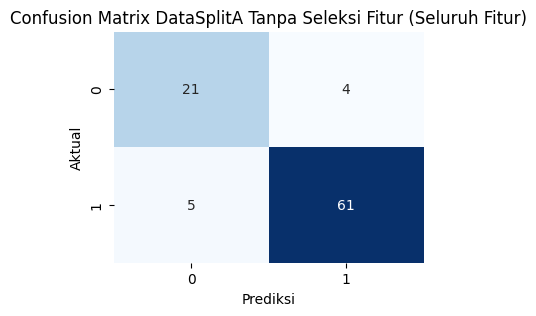

True Positive (TP): 61
True Negative (TN): 21
False Positive (FP): 4
False Negative (FN): 5
Precision: 0.9384615384615385
Sensitivity / Recall: 0.9242424242424242
Accuracy: 0.9010989010989011
F1-Score: 0.9312977099236641
Average Training time: 0.007213568687438965 seconds
Average Prediction time: 0.004038572311401367 seconds


In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.svm import SVC

train_times = []
pred_times = []

num_executions = 10

for _ in range(num_executions):
    start_train_time = time.time()
    evaluation_model = SVC(C=0.8, degree=1, gamma='auto', kernel='rbf')
    evaluation_model.fit(X_DataSplitA_balanced, y_DataSplitA_balanced)
    end_train_time = time.time()
    train_elapsed_time = end_train_time - start_train_time
    train_times.append(train_elapsed_time)

    start_pred_time = time.time()
    y_pred = evaluation_model.predict(X_test_DataSplitA_scaled)
    end_pred_time = time.time()
    pred_elapsed_time = end_pred_time - start_pred_time
    pred_times.append(pred_elapsed_time)

avg_train_time = sum(train_times) / num_executions
avg_pred_time = sum(pred_times) / num_executions

cm = confusion_matrix(y_test_DataSplitA, y_pred)
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
accuracy = (tp + tn) / (tp + fp + fn + tn)
f1_score = 2 * (precision * recall) / (precision + recall)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix DataSplitA Tanpa Seleksi Fitur (Seluruh Fitur)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)
print("Precision:", precision)
print("Sensitivity / Recall:", recall)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print(f"Average Training time: {avg_train_time} seconds")
print(f"Average Prediction time: {avg_pred_time} seconds")

Tes Akurasi Data Tes 8020 Tanpa Seleksi Fitur (Seluruh Fitur)

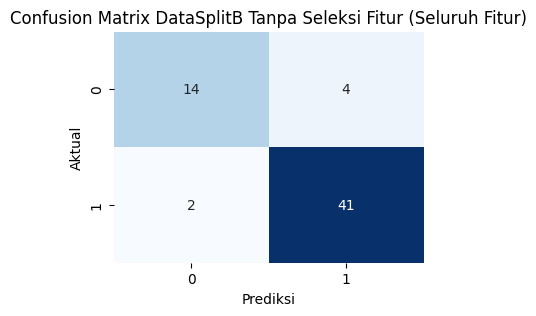

True Positive (TP): 41
True Negative (TN): 14
False Positive (FP): 4
False Negative (FN): 2
Precision: 0.9111111111111111
Sensitivity / Recall: 0.9534883720930233
Accuracy: 0.9016393442622951
F1-Score: 0.9318181818181819
Average Training time: 0.009486842155456542 seconds
Average Prediction time: 0.003167080879211426 seconds


In [40]:
train_times = []
pred_times = []
num_executions = 10
for _ in range(num_executions):
    start_train_time = time.time()
    evaluation_model = SVC(C=1, degree=1, gamma='scale', kernel='rbf')
    evaluation_model.fit(X_DataSplitB_balanced, y_DataSplitB_balanced)
    end_train_time = time.time()
    train_elapsed_time = end_train_time - start_train_time
    train_times.append(train_elapsed_time)
    start_pred_time = time.time()
    y_pred = evaluation_model.predict(X_test_DataSplitB_scaled)
    end_pred_time = time.time()
    pred_elapsed_time = end_pred_time - start_pred_time
    pred_times.append(pred_elapsed_time)
avg_train_time = sum(train_times) / num_executions
avg_pred_time = sum(pred_times) / num_executions
cm = confusion_matrix(y_test_DataSplitB, y_pred)
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
accuracy = (tp + tn) / (tp + fp + fn + tn)
f1_score = 2 * (precision * recall) / (precision + recall)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix DataSplitB Tanpa Seleksi Fitur (Seluruh Fitur)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()
print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)
print("Precision:", precision)
print("Sensitivity / Recall:", recall)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print(f"Average Training time: {avg_train_time} seconds")
print(f"Average Prediction time: {avg_pred_time} seconds")

Tes Akurasi Data Tes 9010 Tanpa Seleksi Fitur (Seluruh Fitur)

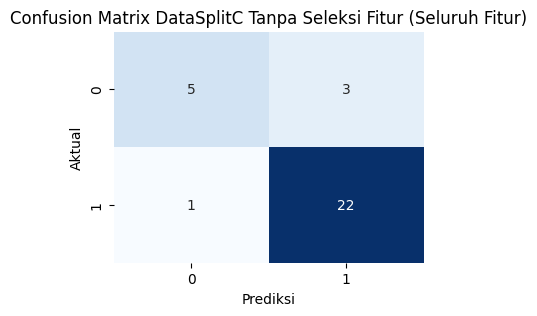

True Positive (TP): 22
True Negative (TN): 5
False Positive (FP): 3
False Negative (FN): 1
Precision: 0.88
Sensitivity / Recall: 0.9565217391304348
Accuracy: 0.8709677419354839
F1-Score: 0.9166666666666666
Average Training time: 0.010229253768920898 seconds
Average Prediction time: 0.003678727149963379 seconds


In [26]:
train_times = []
pred_times = []
num_executions = 10
for _ in range(num_executions):
    start_train_time = time.time()
    evaluation_model = SVC(C=1, degree=1, gamma='scale', kernel='rbf')
    evaluation_model.fit(X_DataSplitC_balanced, y_DataSplitC_balanced)
    end_train_time = time.time()
    train_elapsed_time = end_train_time - start_train_time
    train_times.append(train_elapsed_time)
    start_pred_time = time.time()
    y_pred = evaluation_model.predict(X_test_DataSplitC_scaled)
    end_pred_time = time.time()
    pred_elapsed_time = end_pred_time - start_pred_time
    pred_times.append(pred_elapsed_time)
avg_train_time = sum(train_times) / num_executions
avg_pred_time = sum(pred_times) / num_executions
cm = confusion_matrix(y_test_DataSplitC, y_pred)
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
accuracy = (tp + tn) / (tp + fp + fn + tn)
f1_score = 2 * (precision * recall) / (precision + recall)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix DataSplitC Tanpa Seleksi Fitur (Seluruh Fitur)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()
print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)
print("Precision:", precision)
print("Sensitivity / Recall:", recall)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print(f"Average Training time: {avg_train_time} seconds")
print(f"Average Prediction time: {avg_pred_time} seconds")

Tes Akurasi Data Tes 7030

In [27]:
from sklearn.svm import SVC
for result in hyperparameter_results_DataSplitA:
    num_features = result['Num_Features']
    best_params = result['Best_Params']
    svm_model = SVC(**best_params)
    svm_model.fit(X_DataSplitA_balanced[feature_subset_DataSplitA[num_features-1]], y_DataSplitA_balanced)
    accuracy = svm_model.score(X_test_DataSplitA_scaled[feature_subset_DataSplitA[num_features-1]], y_test_DataSplitA)
    print("Urutan Subset Fitur:", num_features)
    print("Akurasi Tes:", accuracy)
    print("---------------------------------------------------------------------------")

Urutan Subset Fitur: 1
Akurasi Tes: 0.5494505494505495
---------------------------------------------------------------------------
Urutan Subset Fitur: 2
Akurasi Tes: 0.8461538461538461
---------------------------------------------------------------------------
Urutan Subset Fitur: 3
Akurasi Tes: 0.8351648351648352
---------------------------------------------------------------------------
Urutan Subset Fitur: 4
Akurasi Tes: 0.8681318681318682
---------------------------------------------------------------------------
Urutan Subset Fitur: 5
Akurasi Tes: 0.8571428571428571
---------------------------------------------------------------------------
Urutan Subset Fitur: 6
Akurasi Tes: 0.9010989010989011
---------------------------------------------------------------------------
Urutan Subset Fitur: 7
Akurasi Tes: 0.8791208791208791
---------------------------------------------------------------------------
Urutan Subset Fitur: 8
Akurasi Tes: 0.8791208791208791
----------------------------

Tes Akurasi Data Tes 8020

In [28]:
for result in hyperparameter_results_DataSplitB:
    num_features = result['Num_Features']
    best_params = result['Best_Params']
    svm_model = SVC(**best_params)
    svm_model.fit(X_DataSplitB_balanced[feature_subset_DataSplitB[num_features-1]], y_DataSplitB_balanced)
    accuracy = svm_model.score(X_test_DataSplitB_scaled[feature_subset_DataSplitB[num_features-1]], y_test_DataSplitB)
    print("Urutan Subset Fitur:", num_features)
    print("Akurasi Tes:", accuracy)
    print("---------------------------------------------------------------------------")

Urutan Subset Fitur: 1
Akurasi Tes: 0.5245901639344263
---------------------------------------------------------------------------
Urutan Subset Fitur: 2
Akurasi Tes: 0.819672131147541
---------------------------------------------------------------------------
Urutan Subset Fitur: 3
Akurasi Tes: 0.819672131147541
---------------------------------------------------------------------------
Urutan Subset Fitur: 4
Akurasi Tes: 0.819672131147541
---------------------------------------------------------------------------
Urutan Subset Fitur: 5
Akurasi Tes: 0.8524590163934426
---------------------------------------------------------------------------
Urutan Subset Fitur: 6
Akurasi Tes: 0.8360655737704918
---------------------------------------------------------------------------
Urutan Subset Fitur: 7
Akurasi Tes: 0.8360655737704918
---------------------------------------------------------------------------
Urutan Subset Fitur: 8
Akurasi Tes: 0.8360655737704918
-------------------------------

Tes Akurasi Data Tes 9010

In [29]:
for result in hyperparameter_results_DataSplitC:
    num_features = result['Num_Features']
    best_params = result['Best_Params']
    svm_model = SVC(**best_params)
    svm_model.fit(X_DataSplitC_balanced[feature_subset_DataSplitC[num_features-1]], y_DataSplitC_balanced)
    accuracy = svm_model.score(X_test_DataSplitC_scaled[feature_subset_DataSplitC[num_features-1]], y_test_DataSplitC)
    print("Urutan Subset Fitur:", num_features)
    print("Akurasi Tes:", accuracy)
    print("---------------------------------------------------------------------------")

Urutan Subset Fitur: 1
Akurasi Tes: 0.45161290322580644
---------------------------------------------------------------------------
Urutan Subset Fitur: 2
Akurasi Tes: 0.8387096774193549
---------------------------------------------------------------------------
Urutan Subset Fitur: 3
Akurasi Tes: 0.8387096774193549
---------------------------------------------------------------------------
Urutan Subset Fitur: 4
Akurasi Tes: 0.8064516129032258
---------------------------------------------------------------------------
Urutan Subset Fitur: 5
Akurasi Tes: 0.8387096774193549
---------------------------------------------------------------------------
Urutan Subset Fitur: 6
Akurasi Tes: 0.8387096774193549
---------------------------------------------------------------------------
Urutan Subset Fitur: 7
Akurasi Tes: 0.9032258064516129
---------------------------------------------------------------------------
Urutan Subset Fitur: 8
Akurasi Tes: 0.9032258064516129
---------------------------

Evaluasi Akurasi Tes Terbaik Dari Data 7030 (Subset Fitur 18)

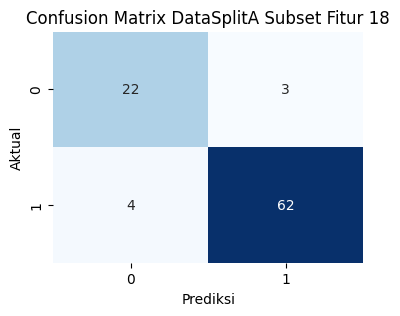

True Positive (TP): 62
True Negative (TN): 22
False Positive (FP): 3
False Negative (FN): 4
Precision: 0.9538461538461539
Sensitivity / Recall: 0.9393939393939394
Accuracy: 0.9230769230769231
F1-Score: 0.9465648854961831
Average Training time: 0.006581401824951172 seconds
Average Prediction time: 0.0039168596267700195 seconds


In [30]:
train_times = []
pred_times = []
num_executions = 10
for _ in range(num_executions):
    start_train_time = time.time()
    evaluation_model = SVC(C=0.8, degree=1, gamma='auto', kernel='rbf')
    evaluation_model.fit(X_DataSplitA_balanced[feature_subset_DataSplitA[17]], y_DataSplitA_balanced)
    end_train_time = time.time()
    train_elapsed_time = end_train_time - start_train_time
    train_times.append(train_elapsed_time)
    start_pred_time = time.time()
    y_pred = evaluation_model.predict(X_test_DataSplitA_scaled[feature_subset_DataSplitA[17]])
    end_pred_time = time.time()
    pred_elapsed_time = end_pred_time - start_pred_time
    pred_times.append(pred_elapsed_time)
avg_train_time = sum(train_times) / num_executions
avg_pred_time = sum(pred_times) / num_executions
cm = confusion_matrix(y_test_DataSplitA, y_pred)
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
accuracy = (tp + tn) / (tp + fp + fn + tn)
f1_score = 2 * (precision * recall) / (precision + recall)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix DataSplitA Subset Fitur 18")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()
print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)
print("Precision:", precision)
print("Sensitivity / Recall:", recall)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print(f"Average Training time: {avg_train_time} seconds")
print(f"Average Prediction time: {avg_pred_time} seconds")

Evaluasi Akurasi Tes Terbaik Dari Data 8020 (Subset Fitur 49)

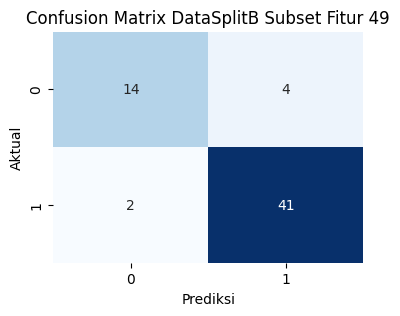

True Positive (TP): 41
True Negative (TN): 14
False Positive (FP): 4
False Negative (FN): 2
Precision: 0.9111111111111111
Sensitivity / Recall: 0.9534883720930233
Accuracy: 0.9016393442622951
F1-Score: 0.9318181818181819
Average Training time: 0.007659602165222168 seconds
Average Prediction time: 0.003075242042541504 seconds


In [42]:
train_times = []
pred_times = []

num_executions = 10

for _ in range(num_executions):
    start_train_time = time.time()
    evaluation_model = SVC(C=1, degree=1, gamma='auto', kernel='rbf')
    evaluation_model.fit(X_DataSplitB_balanced[feature_subset_DataSplitB[48]], y_DataSplitB_balanced)
    end_train_time = time.time()
    train_elapsed_time = end_train_time - start_train_time
    train_times.append(train_elapsed_time)

    start_pred_time = time.time()
    y_pred = evaluation_model.predict(X_test_DataSplitB_scaled[feature_subset_DataSplitB[48]])
    end_pred_time = time.time()
    pred_elapsed_time = end_pred_time - start_pred_time
    pred_times.append(pred_elapsed_time)

avg_train_time = sum(train_times) / num_executions
avg_pred_time = sum(pred_times) / num_executions

cm = confusion_matrix(y_test_DataSplitB, y_pred)
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
accuracy = (tp + tn) / (tp + fp + fn + tn)
f1_score = 2 * (precision * recall) / (precision + recall)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix DataSplitB Subset Fitur 49")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)
print("Precision:", precision)
print("Sensitivity / Recall:", recall)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print(f"Average Training time: {avg_train_time} seconds")
print(f"Average Prediction time: {avg_pred_time} seconds")

Evaluasi Akurasi Tes Terbaik Dari Data 9010 (Subset Fitur 13)

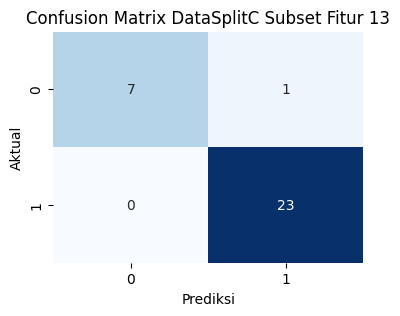

True Positive (TP): 23
True Negative (TN): 7
False Positive (FP): 1
False Negative (FN): 0
Precision: 0.9583333333333334
Sensitivity / Recall: 1.0
Accuracy: 0.967741935483871
F1-Score: 0.9787234042553191
Average Training time: 0.005078673362731934 seconds
Average Prediction time: 0.0019747734069824217 seconds


In [32]:
train_times = []
pred_times = []
num_executions = 10
for _ in range(num_executions):
    start_train_time = time.time()
    evaluation_model = SVC(C=0.6, degree=1, gamma='auto', kernel='linear')
    evaluation_model.fit(X_DataSplitC_balanced[feature_subset_DataSplitC[12]], y_DataSplitC_balanced)
    end_train_time = time.time()
    train_elapsed_time = end_train_time - start_train_time
    train_times.append(train_elapsed_time)
    start_pred_time = time.time()
    y_pred = evaluation_model.predict(X_test_DataSplitC_scaled[feature_subset_DataSplitC[12]])
    end_pred_time = time.time()
    pred_elapsed_time = end_pred_time - start_pred_time
    pred_times.append(pred_elapsed_time)
avg_train_time = sum(train_times) / num_executions
avg_pred_time = sum(pred_times) / num_executions
cm = confusion_matrix(y_test_DataSplitC, y_pred)
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
accuracy = (tp + tn) / (tp + fp + fn + tn)
f1_score = 2 * (precision * recall) / (precision + recall)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix DataSplitC Subset Fitur 13")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()
print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)
print("Precision:", precision)
print("Sensitivity / Recall:", recall)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print(f"Average Training time: {avg_train_time} seconds")
print(f"Average Prediction time: {avg_pred_time} seconds")